In [1]:
%load_ext lab_black

In [1]:
import os
import sys

import joblib
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import tensorflow as tf
import tensorflow.keras as keras
import xarray as xr
from cmcrameri import cm
from hydra import compose, initialize
from omegaconf import OmegaConf, DictConfig
from scipy.optimize import differential_evolution
from sklearn import preprocessing

sys.path.append("../")
import nb_eval.matplotlib_functions as mympf
from cfg.convert_cfg_to_yaml import save_myyaml_from_mycfg
from Data import Data_eval
from include.loss import pixel_weighted_cross_entropy
import model_eval
import models.reg as rm


import matplotlib_functions as mympf

mympf.setMatplotlibParam()
plt.viridis()

dir_res = "/cerea_raid/users/dumontj/dev/coco2/dl/res"

2023-02-22 13:37:58.827804: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2 AVX AVX2 AVX512F FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


<Figure size 1920x1440 with 0 Axes>

In [2]:
name_model = "/cerea_raid/users/dumontj/dev/coco2/dl/nb_train/sim/lip/xco2_prec_winds_noisy_modelX/w_last.h5"
path_eval_nc = "/libre/dumontj/coco2/dl-input/2km_Lip/2d_valid_dataset.nc"

### On validation data

In [3]:
data = model_eval.get_data_for_inversion(
    os.path.join(dir_res, name_case),
    path_eval_nc,
)

model = model_eval.get_inversion_model(os.path.join(dir_res, name_case))

NameError: name 'name_case' is not defined

In [ ]:
metrics = model_eval.get_inv_metrics_model_on_data(model, data)
print("mae:", np.mean(metrics["mae"]))
print("mape:", np.mean(metrics["mape"]))

In [23]:
mean_metrics = model_eval.get_inv_mean_loss(data)
print("mae:", np.mean(mean_metrics["mae"]))
print("mape:", np.mean(mean_metrics["mape"]))

mae: 2.8171442
mape: 20.199575


36/36 [==============================] - 0s 12ms/step


<Figure size 1920x1440 with 0 Axes>

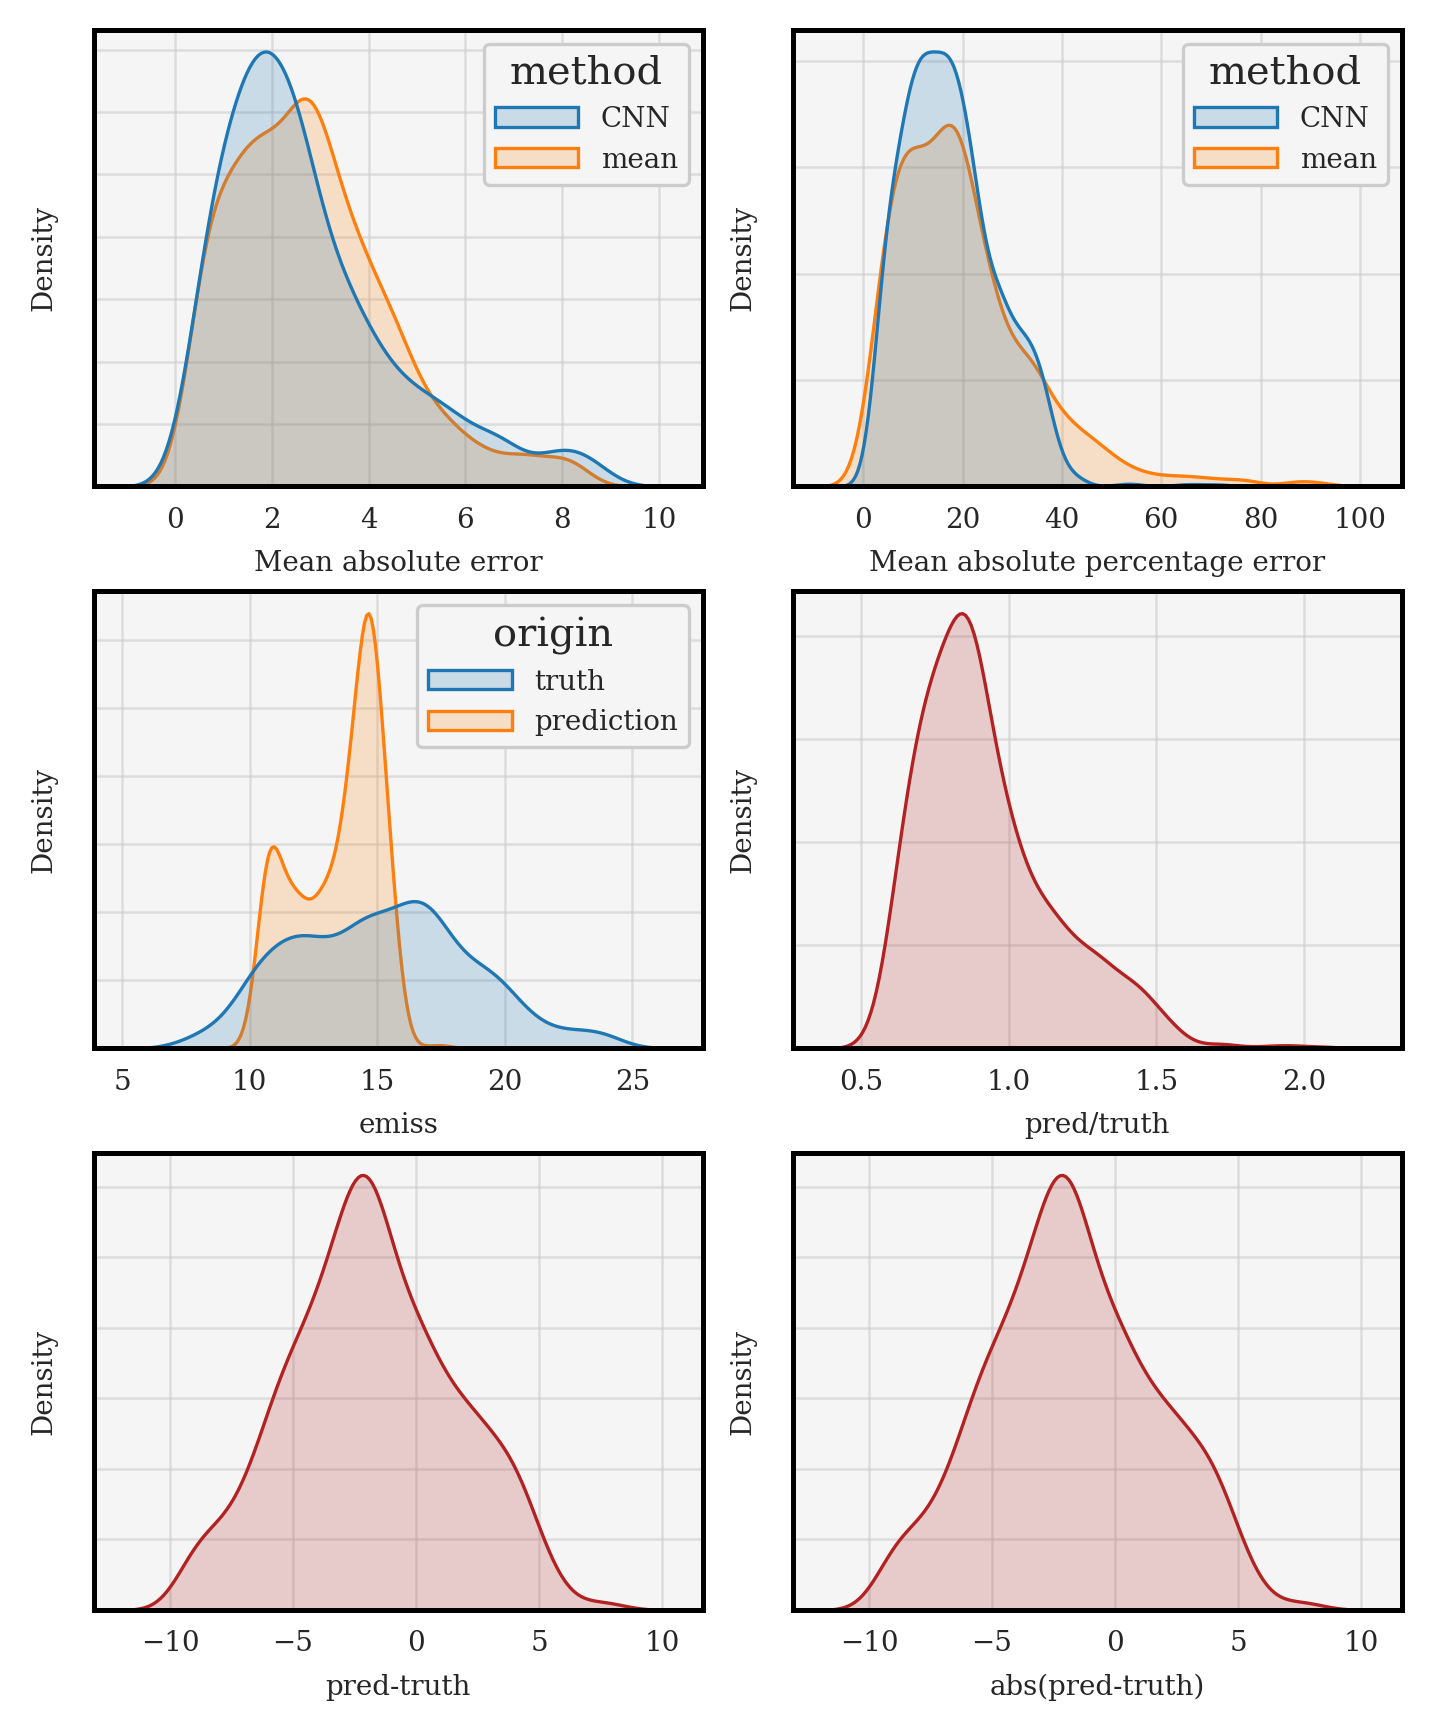

In [10]:
model_eval.get_summary_histo_inversion(model, data)

nwbce: tf.Tensor(2.0652122, shape=(), dtype=float32)
idx 164
origin: smart_2km_Lip_64
time: 2015-02-21T20:00:00.000000000
emiss: [16.74689 16.74711 17.07597 17.56893 18.0619  18.55427]
nwbce: tf.Tensor(4.4758005, shape=(), dtype=float32)
idx 359
origin: smart_2km_Lip_64
time: 2015-04-21T23:00:00.000000000
emiss: [14.11787 15.40135 16.20378 16.36471 16.36491 16.68595]
nwbce: tf.Tensor(2.1008253, shape=(), dtype=float32)
idx 742
origin: smart_2km_Lip_64
time: 2015-08-21T22:00:00.000000000
emiss: [13.69333 14.4068  14.54971 14.54977 14.83521 15.26355]
1/1 [==============================] - 0s 24ms/step


<Figure size 1920x1440 with 0 Axes>

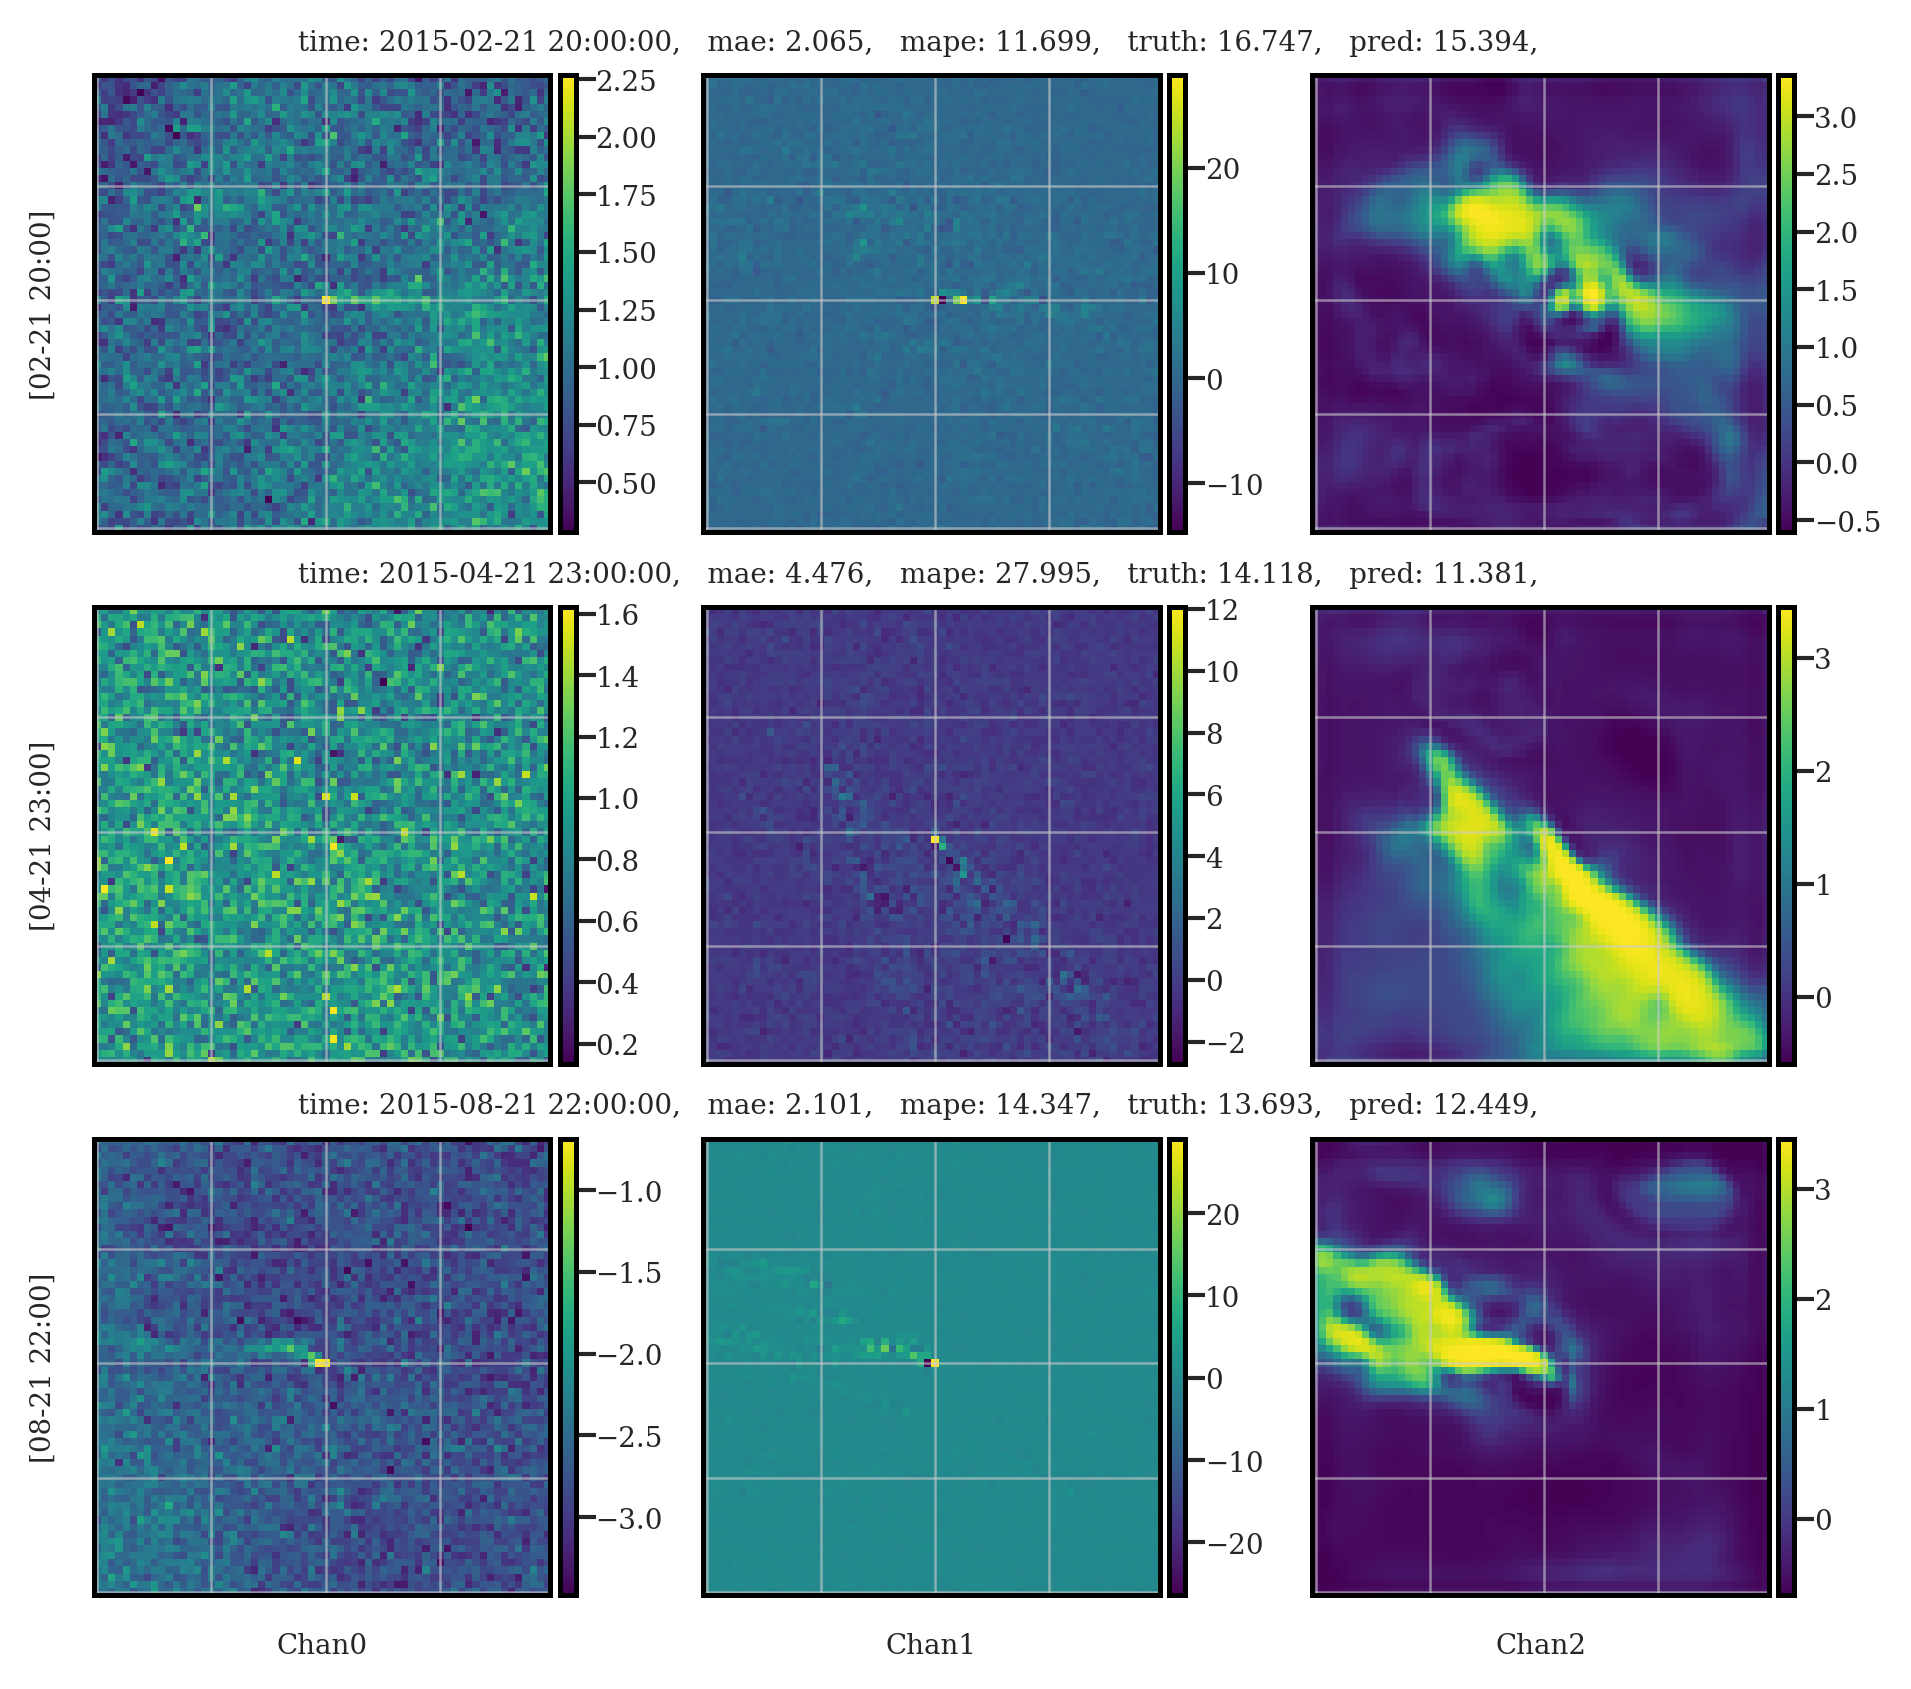

In [11]:
model_eval.plot_inversion_examples(data, metrics["mae"], metrics["mape"], model)

### On training dataset

In [ ]:
data_2 = model_eval.get_data_for_inversion(
    os.path.join(dir_res, name_case),
    path_eval_nc_2,
)

In [ ]:
metrics_2 = model_eval.get_inv_metrics_model_on_data(model, data_2)
print(metrics_2)

1180/1180 [==============================] - 15s 12ms/step


<Figure size 1920x1440 with 0 Axes>

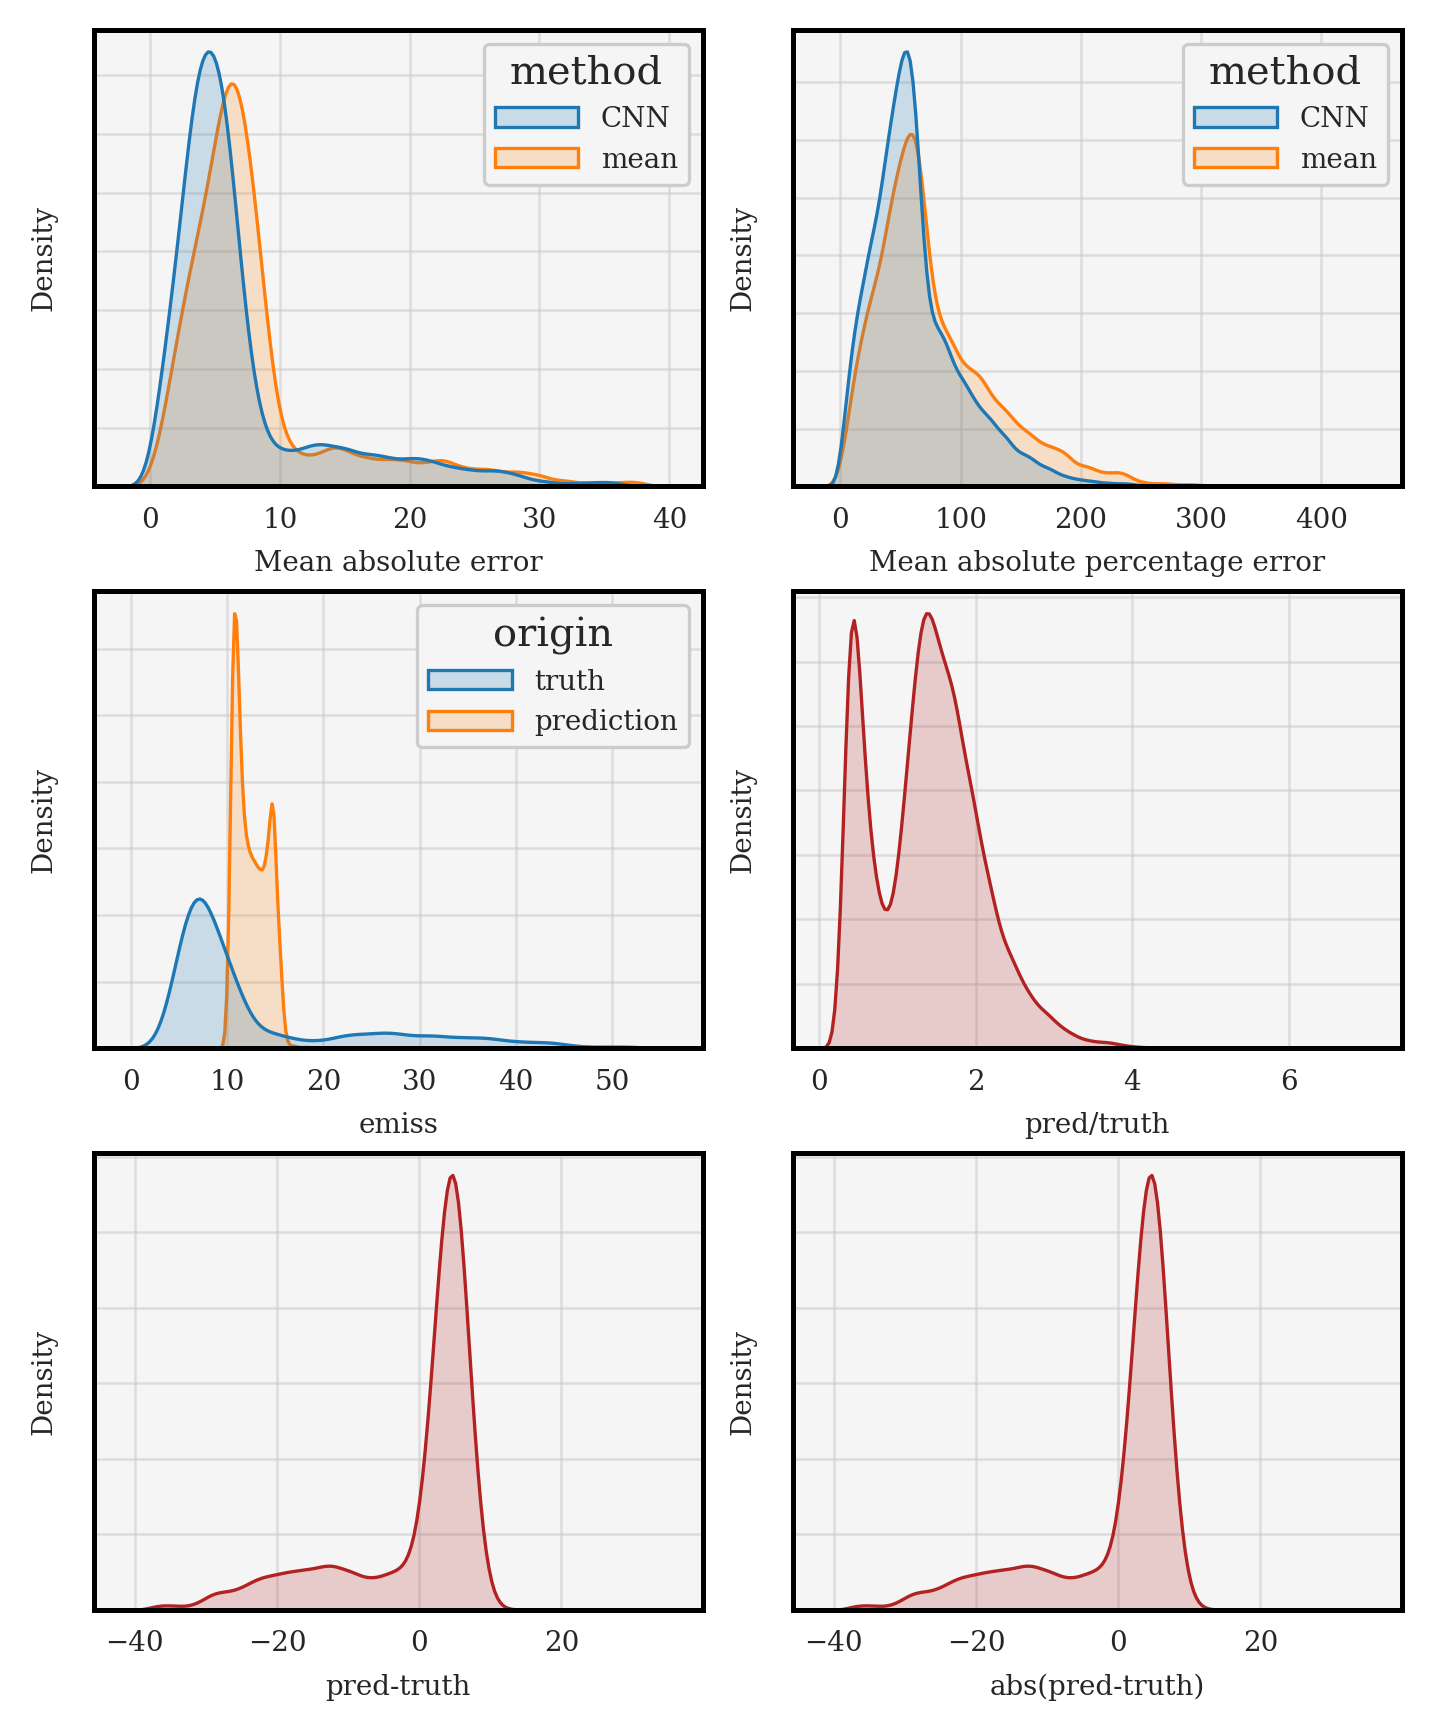

In [21]:
model_eval.get_summary_histo_inversion(model, data_2)

nwbce: tf.Tensor(1.2710251, shape=(), dtype=float32)
idx 31045
origin: smart_2km_Dolo_64
time: 2015-11-30T09:00:00.000000000
emiss: [11.25308  11.34612  11.06718  10.0442    8.556089  7.43994 ]
nwbce: tf.Tensor(6.941523, shape=(), dtype=float32)
idx 5584
origin: smart_2km_Ber_64
time: 2015-11-13T16:00:00.000000000
emiss: [23.25599 22.53739 21.31395 21.14522 21.66219 21.69253]
nwbce: tf.Tensor(5.567472, shape=(), dtype=float32)
idx 20632
origin: smart_2km_Tur_64
time: 2015-04-12T13:00:00.000000000
emiss: [8.035856 8.1756   8.45508  8.455048 8.524947 8.315406]
1/1 [==============================] - 0s 23ms/step


<Figure size 1920x1440 with 0 Axes>

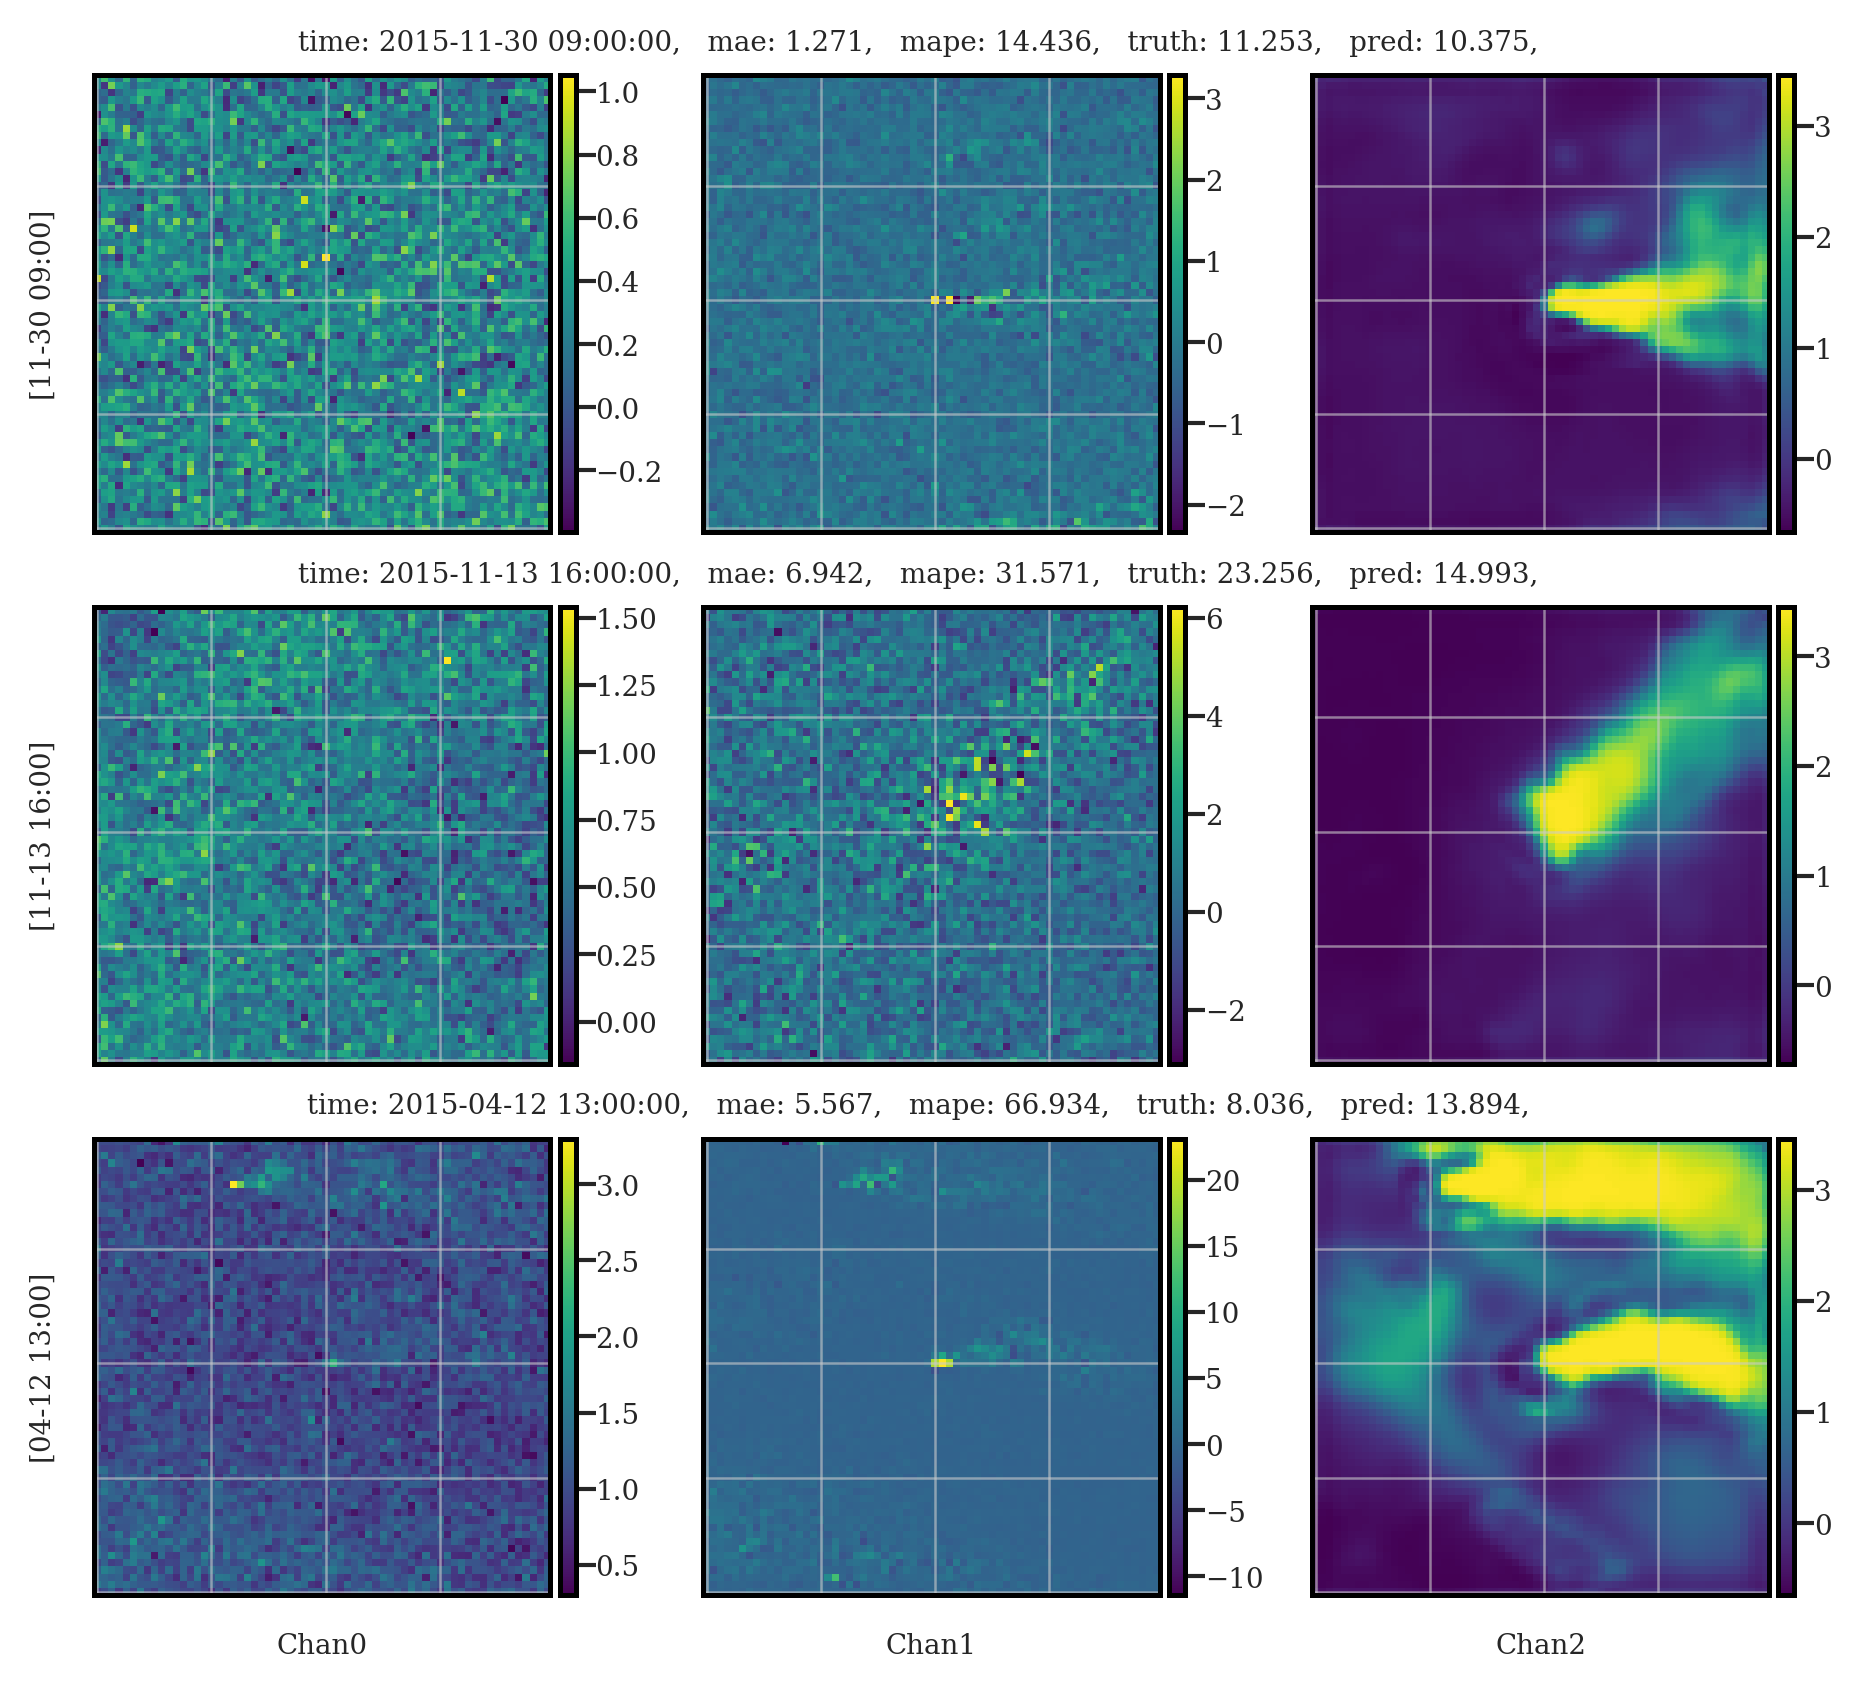

In [23]:
model_eval.plot_inversion_examples(data_2, metrics_2["mae"], metrics_2["mape"], model)

In [19]:
name_model = "/cerea_raid/users/dumontj/dev/coco2/dl/nb_train/sim/lip/xco2_prec_winds_noisy_modelX/w_best.h5"
path_eval_nc = "/libre/dumontj/coco2/dl-input/2km_Lip/valid_dataset.nc"

In [20]:
data = Data_eval(path_eval_nc)
data.prepare_input(
    "xco2", "xco2_prec", "u_wind", "v_wind", "None"
)
data.prepare_output_inversion(1)

In [21]:
data.x.eval.shape

(1152, 64, 64, 4)

In [22]:
model_2 = tf.keras.models.load_model(name_model)

In [23]:
metrics = model_eval.get_inv_metrics_model_on_data(model_2, data)
print("mae:", np.mean(metrics["mae"]))
print("mape:", np.mean(metrics["mape"]))

36/36 [==============================] - 0s 4ms/step
mae: 6.784358
mape: 42.326035


36/36 [==============================] - 0s 4ms/step


<Figure size 1920x1440 with 0 Axes>

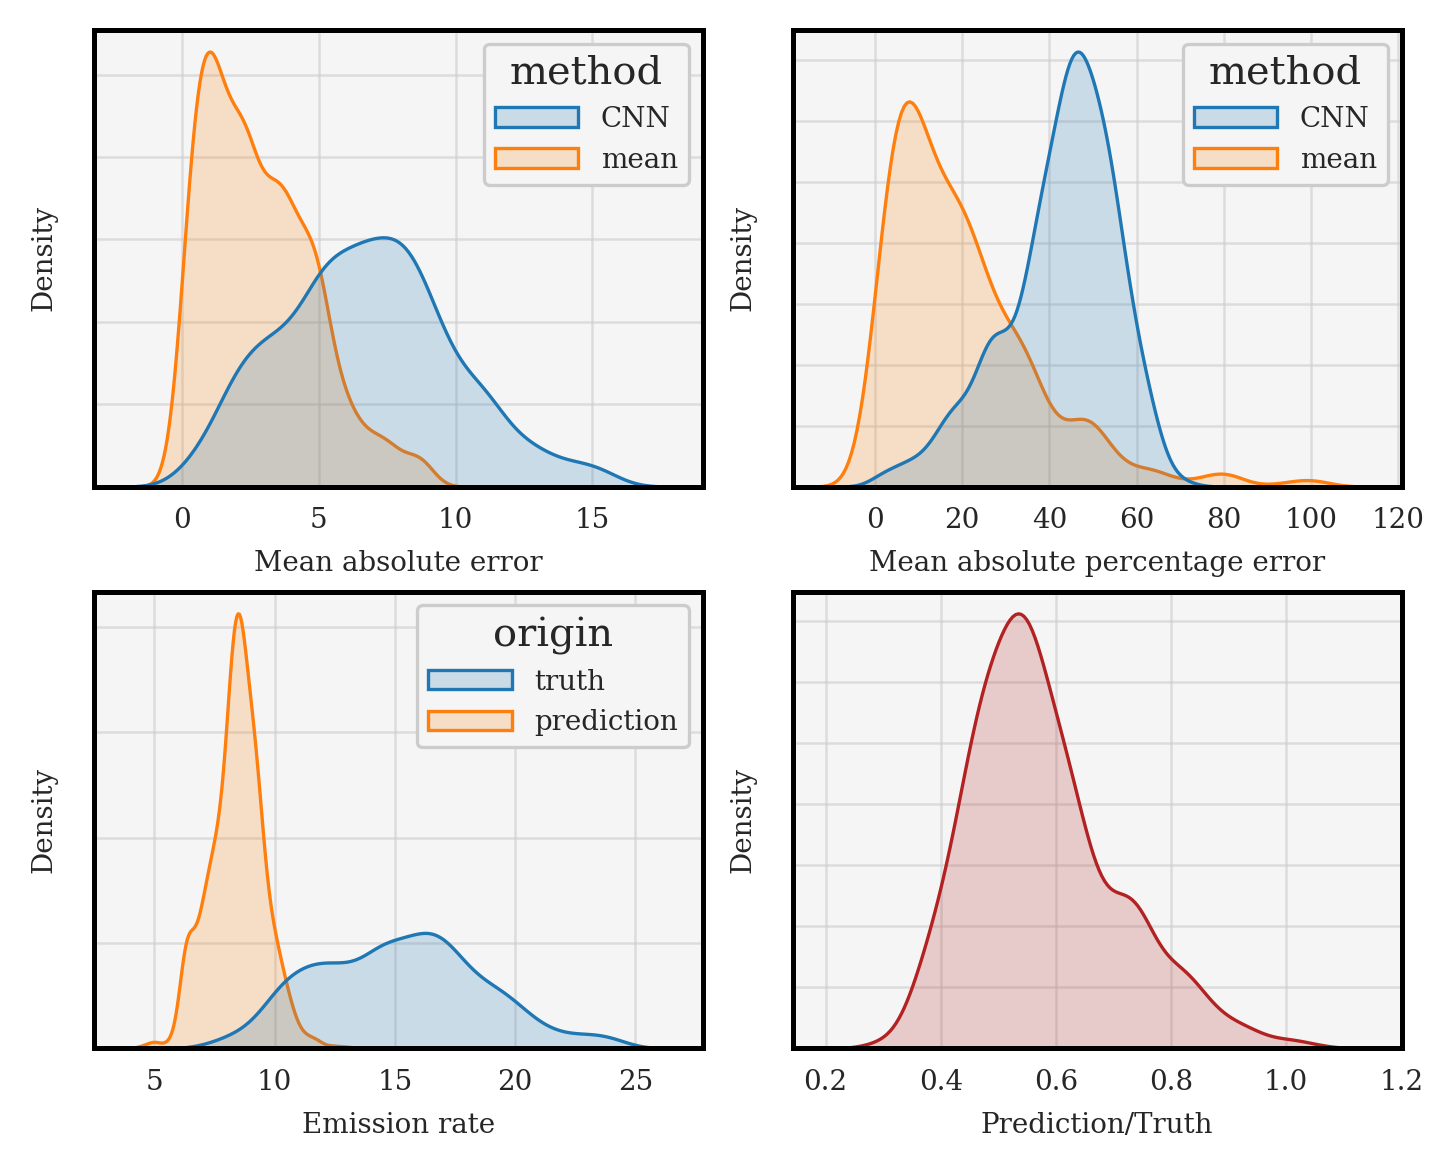

In [24]:
model_eval.get_summary_histo_inversion(model_2, data)

In [89]:
from keras.utils.vis_utils import plot_model

In [93]:
model_2.summary()

Model: "model_3"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_layer (InputLayer)       [(None, 64, 64, 4)]  0           []                               
                                                                                                  
 tf.__operators__.getitem_1 (Sl  (None, 64, 64, 1)   0           ['input_layer[0][0]']            
 icingOpLambda)                                                                                   
                                                                                                  
 tf.__operators__.getitem_2 (Sl  (None, 64, 64, 1)   0           ['input_layer[0][0]']            
 icingOpLambda)                                                                                   
                                                                                            

In [95]:
model_2.get_layer("model_2").get_layer("conv2d_15")

In [ ]:
model.get_layer("preproc_norm").get_output_at(2)

In [112]:
model_2.get_layer("model_2").get_layer("conv2d_15")

In [110]:
model_2.get_layer("model_2").layers[3]

In [115]:
tf.keras.models.Model([model_2.inputs],  model_2.get_layer("model_2").layers[3].get_output_at(0))

ValueError: Graph disconnected: cannot obtain value for tensor KerasTensor(type_spec=TensorSpec(shape=(None, 64, 64, 4), dtype=tf.float32, name='input_2'), name='input_2', description="created by layer 'input_2'") at layer "conv2d_8". The following previous layers were accessed without issue: []

In [107]:
tf.keras.models.Model([model_2.inputs],  model_2.get_layer("model_2").get_layer("conv2d_15").get_output_at(2))

ValueError: Asked to get output at node 2, but the layer has only 1 inbound nodes.

In [102]:
conv_layer = model_2.get_layer("model_2").get_layer("conv2d_15")
heatmap_model = tf.keras.models.Model([model_2.inputs], [conv_layer.output, model_2.output])

ValueError: Graph disconnected: cannot obtain value for tensor KerasTensor(type_spec=TensorSpec(shape=(None, 64, 64, 4), dtype=tf.float32, name='input_2'), name='input_2', description="created by layer 'input_2'") at layer "conv2d_8". The following previous layers were accessed without issue: []

In [79]:
conv_layer = model.get_layer("conv2d_15")
heatmap_model = tf.keras.models.Model([model_2.inputs], [conv_layer.output, model_2.output])

# Get gradient of the winner class w.r.t. the output of the (last) conv. layer
with tf.GradientTape() as gtape:
    conv_output, predictions = heatmap_model(x)
    loss = predictions[:, np.argmax(predictions[0])]
    grads = gtape.gradient(loss, conv_output)
    pooled_grads = K.mean(grads, axis=(0, 1, 2))

heatmap = tf.reduce_mean(tf.multiply(pooled_grads, conv_output), axis=-1)
heatmap = np.maximum(heatmap, 0)
max_heat = np.max(heatmap)
if max_heat == 0:
    max_heat = 1e-10
heatmap /= max_heat

print(heatmap.shape)

ValueError: No such layer: conv2d_15. Existing layers are: ['input_1', 'block1_conv1', 'block1_conv2', 'block1_pool', 'block2_conv1', 'block2_conv2', 'block2_pool', 'block3_conv1', 'block3_conv2', 'block3_conv3', 'block3_pool', 'block4_conv1', 'block4_conv2', 'block4_conv3', 'block4_pool', 'block5_conv1', 'block5_conv2', 'block5_conv3', 'block5_pool', 'flatten', 'fc1', 'fc2', 'predictions'].

In [73]:

import matplotlib.pyplot as plt
import tensorflow as tf
import numpy as np

import tensorflow as tf
from tensorflow.keras import backend as K

from IPython.display import Image, display
import matplotlib.pyplot as plt
import matplotlib.cm as cm

In [2]:
model = tf.keras.applications.vgg16.VGG16(weights="imagenet")

img_path = "/cerea_raid/users/dumontj/elephant.jpg"
img = tf.keras.preprocessing.image.load_img(img_path, target_size=(224,224))
x = tf.keras.preprocessing.image.img_to_array(img)
x = np.expand_dims(x, axis=0)
x = tf.keras.applications.vgg16.preprocess_input(x)

pred=model.predict(x)

2023-02-20 16:09:48.184837: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2 AVX AVX2 AVX512F AVX512_VNNI FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-02-20 16:09:48.793122: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1613] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 13775 MB memory:  -> device: 0, name: Tesla T4, pci bus id: 0000:3b:00.0, compute capability: 7.5
2023-02-20 16:09:56.541375: I tensorflow/compiler/xla/stream_executor/cuda/cuda_dnn.cc:428] Loaded cuDNN version 8401
2023-02-20 16:09:57.229241: I tensorflow/tsl/platform/default/subprocess.cc:304] Start cannot spawn child process: No such file or directory


1/1 [==============================] - 2s 2s/step


In [3]:
conv_layer = model.get_layer("block5_conv3")
heatmap_model = tf.keras.models.Model([model.inputs], [conv_layer.output, model.output])

# Get gradient of the winner class w.r.t. the output of the (last) conv. layer
with tf.GradientTape() as gtape:
    conv_output, predictions = heatmap_model(x)
    loss = predictions[:, np.argmax(predictions[0])]
    grads = gtape.gradient(loss, conv_output)
    pooled_grads = K.mean(grads, axis=(0, 1, 2))

heatmap = tf.reduce_mean(tf.multiply(pooled_grads, conv_output), axis=-1)
heatmap = np.maximum(heatmap, 0)
max_heat = np.max(heatmap)
if max_heat == 0:
    max_heat = 1e-10
heatmap /= max_heat

print(heatmap.shape)


(1, 14, 14)


In [4]:
def save_and_display_gradcam(img_path, heatmap, cam_path="cam.jpg", alpha=0.4):
    # Load the original image
    img = tf.keras.preprocessing.image.load_img(img_path)
    img = tf.keras.preprocessing.image.img_to_array(img)

    # Rescale heatmap to a range 0-255
    heatmap = np.uint8(255 * heatmap)

    # Use jet colormap to colorize heatmap
    jet = cm.get_cmap("jet")

    # Use RGB values of the colormap
    jet_colors = jet(np.arange(256))[:, :3]
    jet_heatmap = jet_colors[heatmap]

    # Create an image with RGB colorized heatmap
    jet_heatmap = tf.keras.preprocessing.image.array_to_img(jet_heatmap[0])
    jet_heatmap = jet_heatmap.resize((img.shape[1], img.shape[0]))
    jet_heatmap = tf.keras.preprocessing.image.img_to_array(jet_heatmap)

    # Superimpose the heatmap on original image
    superimposed_img = jet_heatmap * alpha + img
    superimposed_img = tf.keras.preprocessing.image.array_to_img(superimposed_img)

    # Save the superimposed image
    superimposed_img.save(cam_path)

    # Display Grad CAM
    display(Image(cam_path))

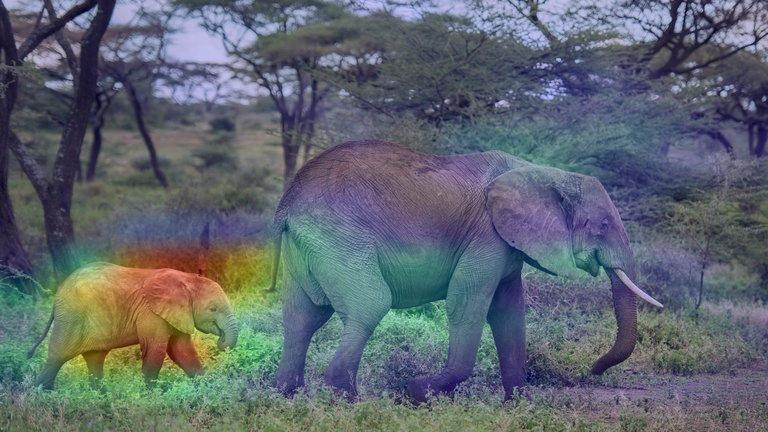

In [5]:
save_and_display_gradcam(img_path, heatmap)